In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#check data -- sanity checks
data  =   pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1333 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()  #check statiscal information


,age,bmi,children,charges
count,1338.000000,1333.000000,1338.000000,1338.000000
mean,39.207025,30.658545,1.094918,13270.422265
std,14.049960,6.092785,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.675000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
#check for missing values

data.isnull().sum() / len(data)

age         0.000000
sex         0.000000
bmi         0.003737
children    0.000000
smoker      0.000000
region      0.000000
charges     0.000000
dtype: float64

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [20]:
#chech missing values from the data
data[data['bmi'].isna()]

,age,sex,bmi,children,smoker,region,charges
14,27,male,NaN,0,yes,southeast,39611.75770
271,50,male,NaN,2,yes,southwest,42856.83800
421,61,male,NaN,0,yes,southeast,46599.10840
545,49,male,NaN,2,yes,northwest,23807.24060
727,29,female,NaN,1,yes,northeast,16657.71745


In [22]:
data.bmi.fillna(data.bmi.mean(), inplace  = True)

In [23]:
#recheck the missing values
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot: xlabel='age', ylabel='Count'>

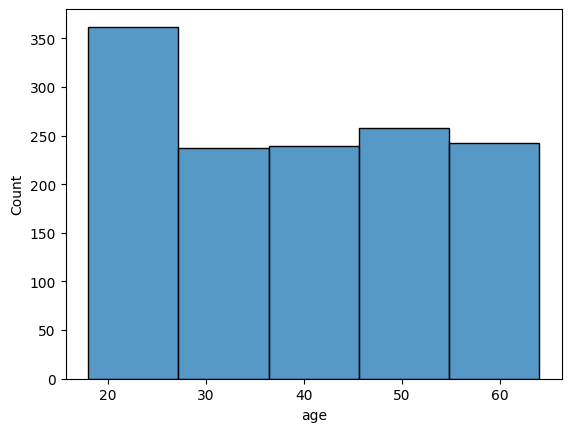

In [28]:
#visualization 
#heat map
#univariate analysis , bivariate analysis , multivariate analysis
sns.histplot(data=data.age , bins= 5)

<AxesSubplot: xlabel='age', ylabel='charges'>

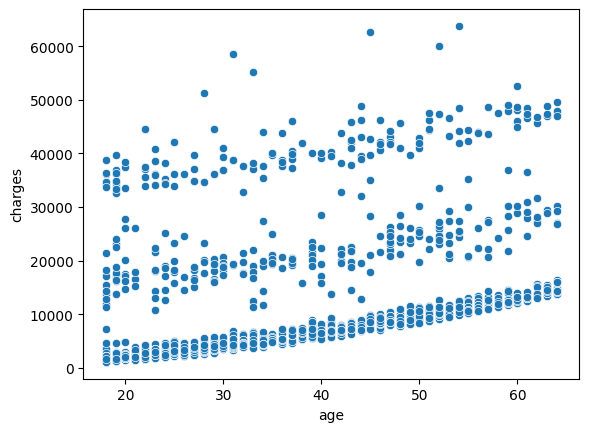

In [29]:
#bivariate analysis

sns.scatterplot(x= data.age , y= data.charges)

C:\Users\heman\AppData\Local\Temp\ipykernel_19484\3573059102.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr(), annot=True)


<AxesSubplot: >

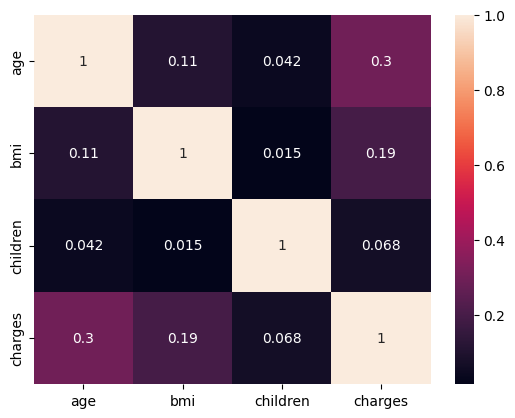

In [30]:
#heatmap
sns.heatmap(data=data.corr(), annot=True)

In [31]:
#feature engineering

cat_cols  = data.select_dtypes('object')  #chcekc for differnt categorical values

for i in list(cat_cols):

    print(data[i].unique())

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [32]:
from sklearn.preprocessing import LabelEncoder


In [34]:
enc = LabelEncoder()

In [59]:
data[['sex', 'smoker', 'region']]  = data[['sex', 'smoker', 'region']].apply(enc.fit_transform)



array([3, 2, 1, 0], dtype=int64)

In [ ]:
sns.heatmap(data.corr(), annot=True)

In [40]:
x =  data[['sex', 'smoker', 'region', 'bmi', 'children']]
y  = data.charges

In [44]:
#SPLIT THE DATA INTO TRAIN AND TEST

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [45]:
#model building 
from sklearn.linear_model  import LinearRegression

In [46]:
model  = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
model_pred  =  model.predict(X_test)

In [49]:
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
print(r2_score(y_true=y_test, y_pred=model_pred))

0.6821222704751527


In [55]:
from joblib import dump , load
dump(model, 'insur.joblib') 

['insur.joblib']

In [56]:
x.columns

Index(['sex', 'smoker', 'region', 'bmi', 'children'], dtype='object')

In [57]:
data.

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int32